In [1]:
# Install TensorFlow
#!pip install --upgrade tensorflow
#!pip install -q tensorflow-gpu
!pip install tensorflow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0


In [0]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

In [3]:
# Load data

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Scales them to be between 0 and 1

11493376/11490434 [==============================] - 0s 0us/step


# EDA

In [4]:
x_train.shape # 60000 28x28 pixel images

(60000, 28, 28)

# Build Model

In [0]:
N, D, _ = x_train.shape

In [6]:
i = Input(shape=(D,D))
x = Flatten()(i)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
r = model.fit(x_train, y_train,
              validation_data = (x_test, y_test),
              epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3000 - accuracy: 0.9129 - val_loss: 0.1402 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1449 - accuracy: 0.9565 - val_loss: 0.1074 - val_accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9678 - val_loss: 0.0865 - val_accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0903 - accuracy: 0.9729 - val_loss: 0.0783 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - accuracy: 0.9764 - val_loss: 0.0765 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9792 - val_loss: 0.0706 - val_accuracy: 0.9778
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9810 - val_loss: 0.0710 - val_accuracy:

# Evaluate Model

Text(0.5, 0, 'Epoch')

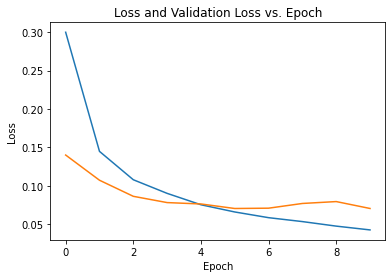

In [8]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='loval_lossss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(33.0, 0.5, 'True Label')

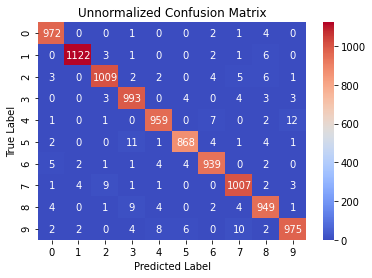

In [9]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test).argmax(axis=1) # Need to take argmax to get class number with highest probability for each sample
colormap = confusion_matrix(y_test, predictions)
import seaborn as sns
ax = sns.heatmap(colormap, annot=True, fmt='d', cmap='coolwarm')
ax.set_title("Unnormalized Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")



(10, 10)
(10, 10)


Text(69.0, 0.5, 'True Label')

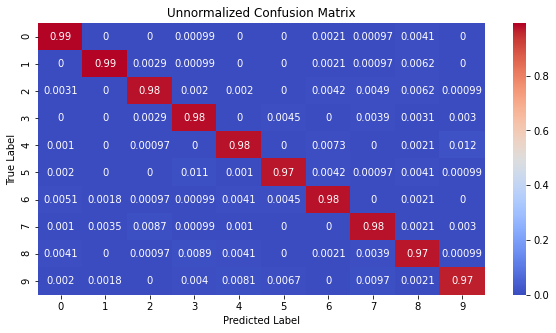

In [10]:
plt.figure(figsize=(10,5))
colormap_normalized = colormap.astype('float') / colormap.sum(axis=1)
print(colormap.shape)
print(colormap_normalized.shape)
plt.figure
ax = sns.heatmap(colormap_normalized, annot=True, cmap='coolwarm')
ax.set_title("Unnormalized Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

In [0]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

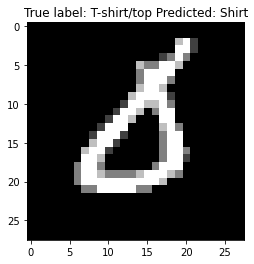

In [16]:
# Show some misclassified examples
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[predictions[i]]));